In [10]:
from subprocess import CalledProcessError
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import IPython
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from lime.lime_tabular import LimeTabularExplainer

df = pd.read_csv("./final.csv")
df = df.dropna()

df["url"] = df["Protocol"] + "://" + df["Domain"] + df["Path"]

df["age_domain"].value_counts()
df["statistical_report"].value_counts()
df["dns_record"].value_counts()


def slashes(url):
    # matched = re.search(dot_pattern, url)
    if len(url.split("/")) > 5:
        return 1
    else:
        return 0


df["slashes"] = df["url"].apply(lambda i: slashes(i))
df["slashes"].value_counts()


def dots(url):
    pattern = re.compile(r"\.")
    # matched = re.search(dot_pattern, url)
    if len(pattern.findall(url)) > 3:
        return 1
    else:
        return 0


df["dots"] = df["url"].apply(lambda i: dots(i))
df["dots"].value_counts()

y = df["label"]
# x = df.drop('Label', axis=1)
x = df.drop(
    [
        "Domain",
        "Path",
        "Protocol",
        "label",
        "Having_@_symbol",
        "Redirection_//_symbol",
        "Having_IP",
        "web_traffic",
        "url",
        "http_tokens",
    ],
    axis=1,
)
print(x.shape, y.shape)

print(x.columns)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, shuffle=True
)
x_train.shape, y_train.shape, x_test.shape, y_test.shape


classfier = DecisionTreeClassifier(random_state=42)
classfier.fit(x_train, y_train)

# predicting the target value from the model for the samples with default values
y_test_tree = classfier.predict(x_test)
y_train_tree = classfier.predict(x_train)

acc_train_tree = accuracy_score(y_train, y_train_tree)
acc_test_tree = accuracy_score(y_test, y_test_tree)

print("Decision Tree: Accuracy on training Data: {:3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:3f}".format(acc_test_tree))
print("Classification report - \n", classification_report(y_test, y_test_tree))
print(confusion_matrix(y_test, y_test_tree))


forest = RandomForestClassifier(max_depth=50, n_estimators=50)

# fit the model
forest.fit(x_train, y_train)
y_test_forest = forest.predict(x_test)
y_train_forest = forest.predict(x_train)

# computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train, y_train_forest)
acc_test_forest = accuracy_score(y_test, y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))
print("Classification report - \n", classification_report(y_test, y_test_forest))
print(confusion_matrix(y_test, y_test_forest))

import xgboost as xgb

xgb_model = xgb.XGBClassifier(learning_rate=0.3, n_estimators=100, max_depth=6)
xgb_model.fit(x_train, y_train)
y_test_xgb = xgb_model.predict(x_test)
y_train_xgb = xgb_model.predict(x_train)

# computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train, y_train_xgb)
acc_test_xgb = accuracy_score(y_test, y_test_xgb)

print("XGB: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGB: Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print("Classification report - \n", classification_report(y_test, y_test_xgb))
print(confusion_matrix(y_test, y_test_xgb))


# class_names = ['original', 'phishing']
# feature_names = list(x_train.columns)

# explainer = LimeTabularExplainer(x_train.values, feature_names=feature_names, class_names=class_names, mode='classification')
# instance = x_test.iloc[5]
# Explain the model prediction for the instance
# explanation = explainer.explain_instance(instance, forest.predict_proba)
# explanation.show_in_notebook()

import pickle
# save the classifier
with open('model.pkl', 'wb') as fid:
    pickle.dump(xgb_model, fid)


(1872, 10) (1872,)
Index(['Prefix_suffix_separation', 'Sub_domains', 'URL_Length', 'age_domain',
       'dns_record', 'domain_registration_length', 'statistical_report',
       'tiny_url', 'slashes', 'dots'],
      dtype='object')
Decision Tree: Accuracy on training Data: 0.859719
Decision Tree: Accuracy on test Data: 0.834667
Classification report - 
               precision    recall  f1-score   support

           0       0.78      0.89      0.83       171
           1       0.90      0.78      0.84       204

    accuracy                           0.83       375
   macro avg       0.84      0.84      0.83       375
weighted avg       0.84      0.83      0.83       375

[[153  18]
 [ 44 160]]
Random forest: Accuracy on training Data: 0.859
Random forest: Accuracy on test Data: 0.853
Classification report - 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       171
           1       0.89      0.83      0.86       204

    accuracy 

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

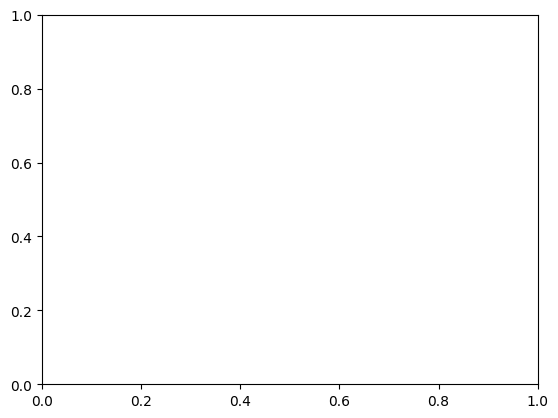

In [14]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming your XGBoost model is stored in xgb_model
# Plotting the first tree
xgb.plot_tree(xgb_model, num_trees=0)
plt.show()

# Feature importance
importance = xgb_model.feature_importances_
# you can print the importance or plot it using matplotlib
plt.bar(range(len(importance)), importance)
plt.show()


In [ ]:
import csv

pairs = [
    ('sbicard.com', 'sbicard-cpp.in', 19.81513645273588),
    ('sbicard.com', 'pawnbirdtoss.com', 20.472493703571722),
    ('icicibank.com', 'icicicards.com', 26.39531039045504),
    ('sbi.co.in', 'bs2shop.in', 28.449245532028367),
    ('sbi.co.in', 'bs2shop2.in', 28.44924553202836),
    ('hdfclife.com', 'hdfcloan.online', 50.501148294387434),
    ('sbi.co.in', 'sbicard-cpp.in', 52.46348932086884),
    ('hdfc.com', 'hdfcloan.online', 54.54946633635613),
    ('icicibank.com', 'icicicorporatebankings.com', 99.99911745912205),
    ('onlinesbi.sbi', 'onlineicici.in', 99.99999999999997),
    ('onlinesbi.sbi', 'banksbi.in', 100.00000000000033)
]

# Write pairs to values.csv
with open('values.csv', 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['parent', 'child', 'similarity'])  # Write header
    for parent, child, similarity in pairs:
        csv_writer.writerow([parent, child, similarity])

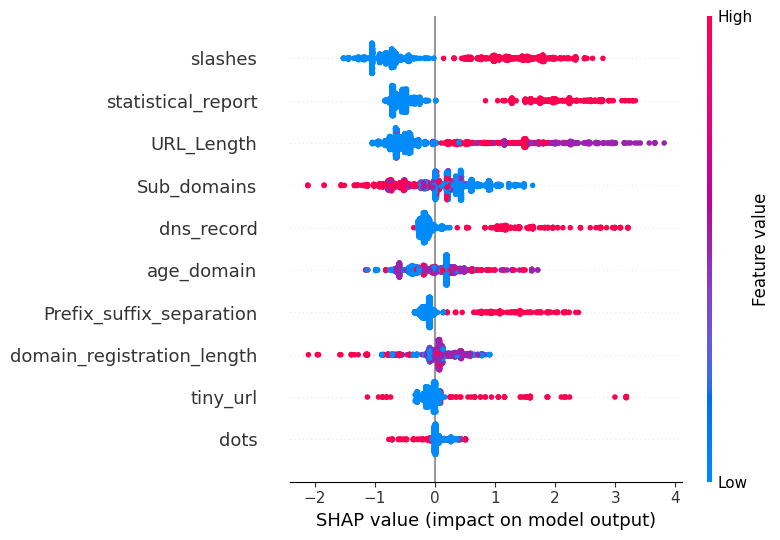

In [13]:
import shap

# Create a SHAP explainer
explainer = shap.Explainer(xgb_model)
shap_values = explainer(x_train)

# Plot summary plot
shap.summary_plot(shap_values, x_train)
